In [24]:
### OTO DOM ! SPRZEDAZ !

import requests
from bs4 import BeautifulSoup
import pandas as pd
houselinks=[]
for x in range(1,2):
    r=requests.get(f'https://www.otodom.pl/sprzedaz/mieszkanie/?page={x}')
    soup=BeautifulSoup(r.content, 'lxml')
    houselist=soup.find_all('div',class_='row section-listing__row')
    for link in soup.find_all("a", {'data-tracking-data':'{"touch_point_button":"title"}'}):
        houselinks.append(link['href'])

# testlink = 'https://www.otodom.pl/pl/oferta/uroczysko-mieszkanie-53-09m2-2-pokoje-z-ogrodem-ID48Nos.html#ab04badaa0'
houselist=[]
for link in houselinks:
    r=requests.get(link)
    soup=BeautifulSoup(r.text, 'lxml')
    body=soup.select('main')[0]

    name=body.find('h1', class_='css-11t1qm5').text.strip()
    cena=body.find('strong',class_='css-1mojccp').text.strip()
    #perMetr=body.find('div',class_='css-4ak5ev').text.strip()
    powierzchnia=body.find('div', class_='css-1s5nyln').text.strip()
    adres=body.find('a',class_='css-1rg0v62').text.strip()
    wojewodztwo=body.find_all('a',class_='css-1o3vi3l')[1].get_text().strip()
    miejscowosc=body.find_all('a',class_='css-1o3vi3l')[2].get_text().strip()
    SprzedazWynajem=body.find_all('a',class_='css-1o3vi3l')[0].get_text().strip()
    rooms={
        'name':name,
        'cena':cena,
        #'perMetr':perMetr,
        'powierzchnia':powierzchnia,
        'adres':adres,
        'wojewodztwo':wojewodztwo,
        'miejscowosc':miejscowosc,
        'Sprzedaz':SprzedazWynajem
    }
    houselist.append(rooms)
    #print(rooms['name'],rooms['cena'],rooms['perMetr'],rooms['powierzchnia'],rooms['adres'])

df=pd.DataFrame(houselist)

In [25]:
# Usuwany polskie znaki 'zł' z kolumny cena praz m2 z kolumn powierzchnia
df.cena=[x.strip('zł') for x in df.cena]
df.powierzchnia=[y.strip('m²') for y in df.powierzchnia]

In [26]:
# w kolumnie cena zamieniamy biały znak(spacje) na element bez białego znaku 1234 zamiast 12 34
df[['cena']] = df[['cena']].replace(' ', '', regex=True)

In [27]:
#usuwamy z kolumny cena wszystkie wartości nienumeryczne
df[df.cena.apply(lambda x: x.isnumeric())]

,name,cena,powierzchnia,adres,wojewodztwo,miejscowosc,Sprzedaz
0,Słoneczne 3 pokoje na Jagodnie,630000,"64,80","Wrocław, Krzyki, Jagodno, Buforowa",dolnośląskie,Wrocław,Mieszkanie na sprzedaż
1,Mieszkanie na zielonym Biskupinie!,347000,34,"Wrocław, Śródmieście, Biskupin, Stanisławskieg...",dolnośląskie,Wrocław,Mieszkanie na sprzedaż
2,Nowy Dwór - 2 pokoje do remontu,339000,"48,80","Wrocław, Fabryczna, Nowy Dwór, Rogowska",dolnośląskie,Wrocław,Mieszkanie na sprzedaż
3,"3 pokoje po remoncie, 57m, Pogodno",419000,"56,94","Szczecin, Zachód, Pogodno",zachodniopomorskie,Szczecin,Mieszkanie na sprzedaż
4,ZAMIESZKAJ w 3 POKOJOWYM Wygodnym Mieszkaniu,399000,"63,30","Kołobrzeg, Nadmorska, ul. Stefana Czarnieckiego",zachodniopomorskie,kołobrzeski,Mieszkanie na sprzedaż
5,Mieszkanie w pięknej okolicy zabytkowego zamku,260000,"87,90","Ząbkowice Śląskie, ząbkowicki, dolnośląskie",dolnośląskie,ząbkowicki,Mieszkanie na sprzedaż
6,Jasne 2 pokoje na Żoliborzu z widokiem na miasto,465000,38,"Warszawa, Żoliborz, ul. Władysława Broniewskiego",mazowieckie,Warszawa,Mieszkanie na sprzedaż
7,"Nowe mieszkania Potasińskiego, Niepołomice Parter",301000,"53,82","Niepołomice, wielicki, małopolskie",małopolskie,wielicki,Mieszkanie na sprzedaż
8,Super Oferta Apatramentu. Kupujący Bez Prowizji.,420000,56,"Łódź, Górna, Waleriana Łukasińskiego",łódzkie,Łódź,Mieszkanie na sprzedaż
9,Super Lokalizacjia .Kupujacy Bez Prowizji,249000,42,"Łódź, Polesie, Karolew, Grodzieńska",łódzkie,Łódź,Mieszkanie na sprzedaż


In [1]:
#rzutujemy kolumnę cena na typ int
df["cena"]=df["cena"].astype(int)

NameError: name 'df' is not defined

In [2]:
#tworzymy zmienną results pogrubowaną miejscowościami z sumą z kolumny cena(wartość int)
results=df.groupby('miejscowosc').sum()
results

NameError: name 'df' is not defined

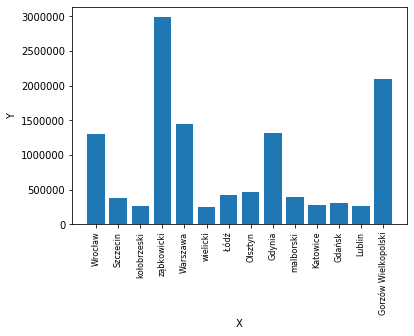

In [33]:
 # SPRZEDAZ WYKRESY

#wyres przedstawiający rozkład sprzedazy mieszkań dla danej miejscowości

import matplotlib.pyplot as plt


miasta=df['miejscowosc'].unique()

plt.bar(miasta,results['cena'])
plt.xticks(miasta,rotation='vertical',size=8)
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

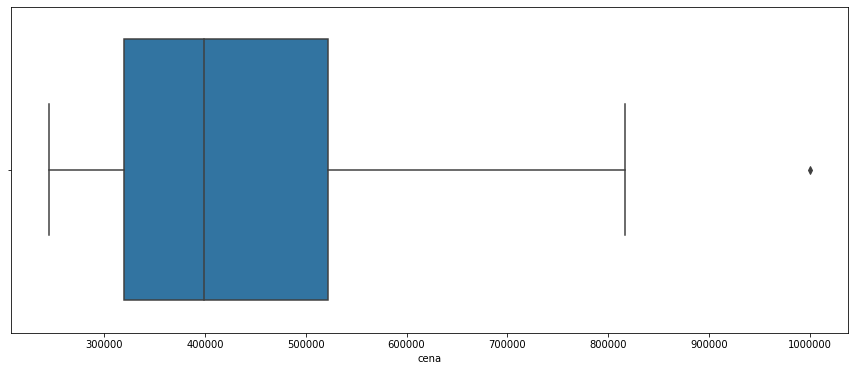

In [34]:
import seaborn as sns

#wykres przedstawiający ogólny rozkład cen mieszkań na sprzedaż

plt.figure(figsize=(15,6))
sns.boxplot(x=df['cena'], data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

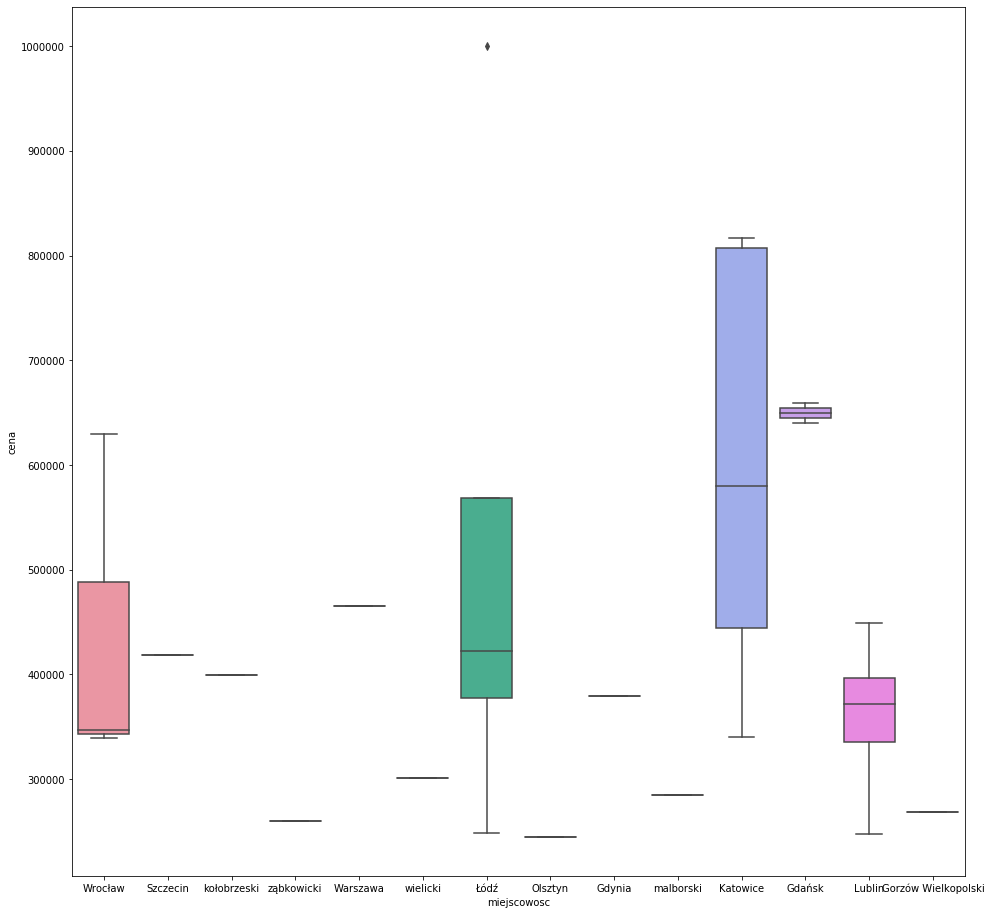

In [37]:
# Rozkład przedstawiajacy cenę sprzedazy mieszkań dla danej miescowosći
plt.figure(figsize=(16,16))
sns.boxplot(x=df['miejscowosc'], y=df['cena'], data=df)
plt.show()

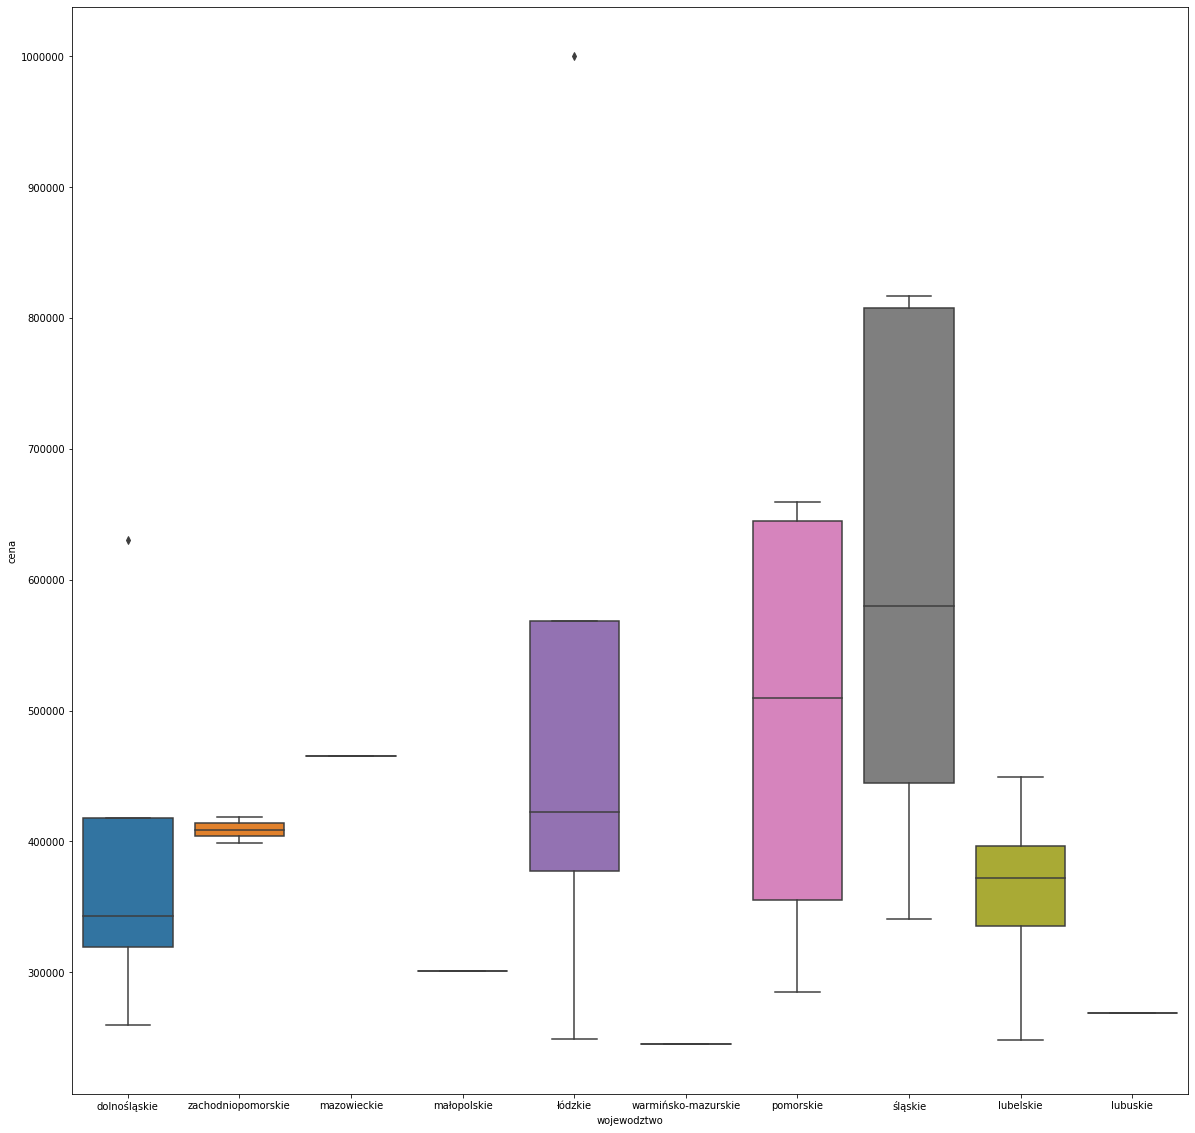

In [41]:
# Rozkład przedstawiajacy rozkład cenę sprzedazy mieszkań w danym wojewodztwie
plt.figure(figsize=(20,20))
sns.boxplot(x=df['wojewodztwo'], y=df['cena'], data=df)
plt.show()

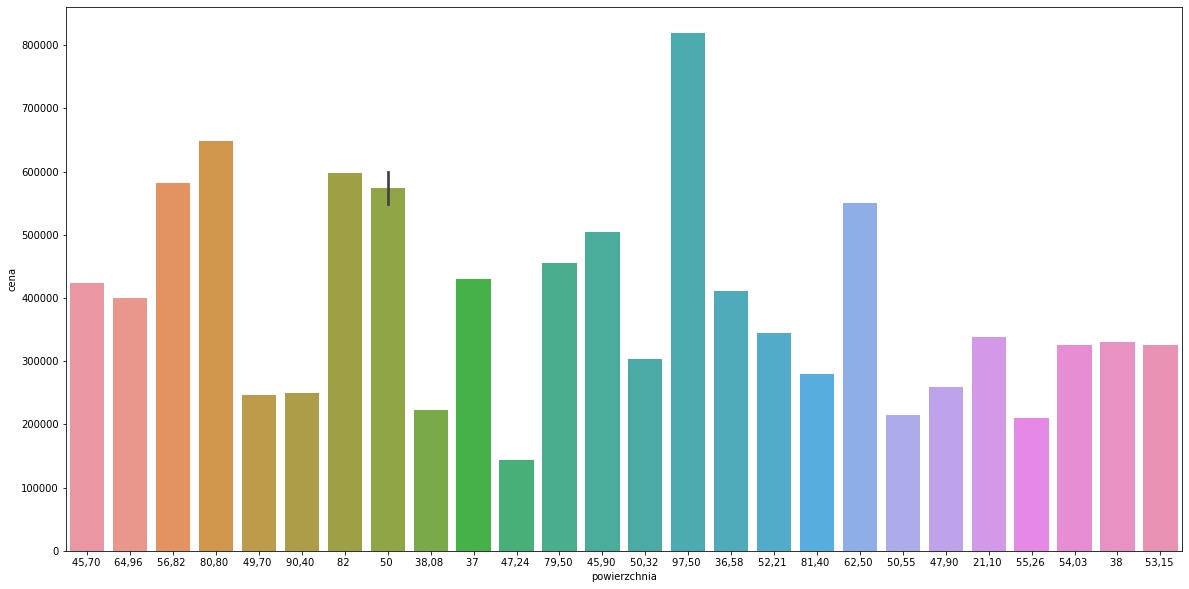

In [40]:
#Rozklad przedtawiajacy wykres slupkowy przedstawiajac cenę powierzni mieszkania na sprzedaż względem ceny
plt.figure(figsize=(20,10))
sns.barplot(x=df['powierzchnia'], y=df['cena'], data=df)

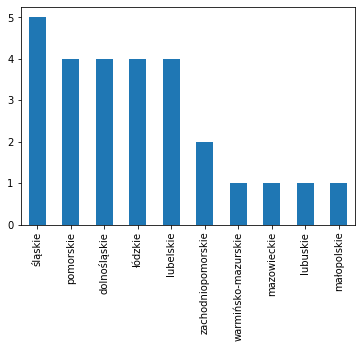

In [42]:
#wykres przedstawiajacy wykres najwiekszej sprzedazy mieszkan w danym wojewodztwie
df['wojewodztwo'].value_counts().head(10).plot.bar()

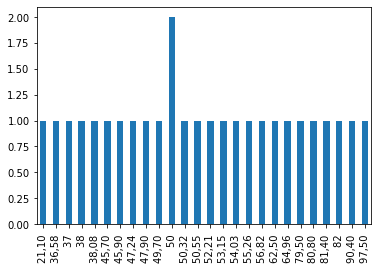

In [42]:
# wykres przedstawiajacy najczesciej sprzedawaną powierzchnię mieszkania
df['powierzchnia'].value_counts().sort_index().plot.bar()

Text(0.5, 1.0, '')

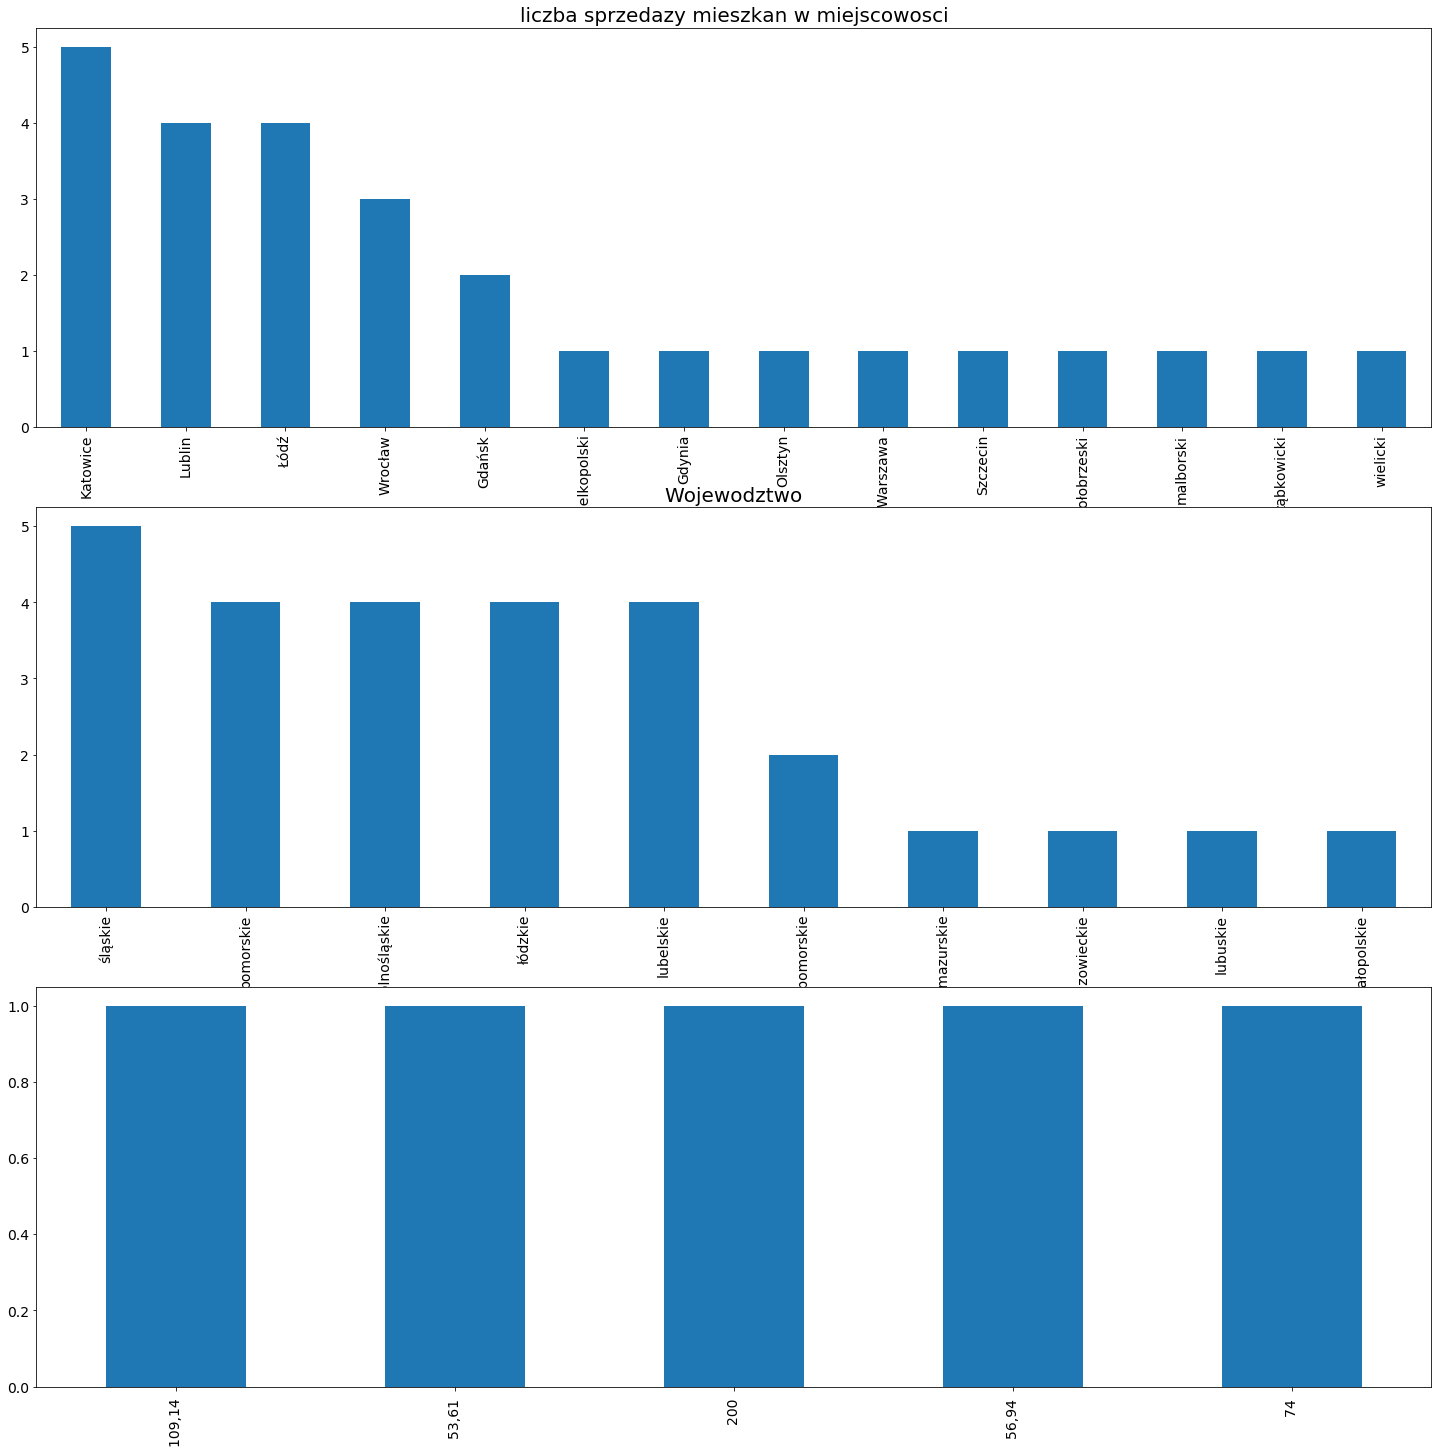

In [43]:
#potem sie opisze

fig, axi = plt.subplots(3,1, figsize = (25,25))
#plot1
df['miejscowosc'].value_counts().plot.bar(
    ax = axi[0],
    fontsize = 14    
)
axi[0].set_title("liczba sprzedazy mieszkan w miejscowosci", fontsize = 20)
#Plot2
df['wojewodztwo'].value_counts().head(10).plot.bar(
    ax = axi[1],
    fontsize = 14
)
axi[1].set_title('Wojewodztwo', fontsize = 20)
#plot3
df['powierzchnia'].value_counts().head().plot.bar(
    ax = axi[2],
    fontsize = 14
)
axi[2].set_title("")

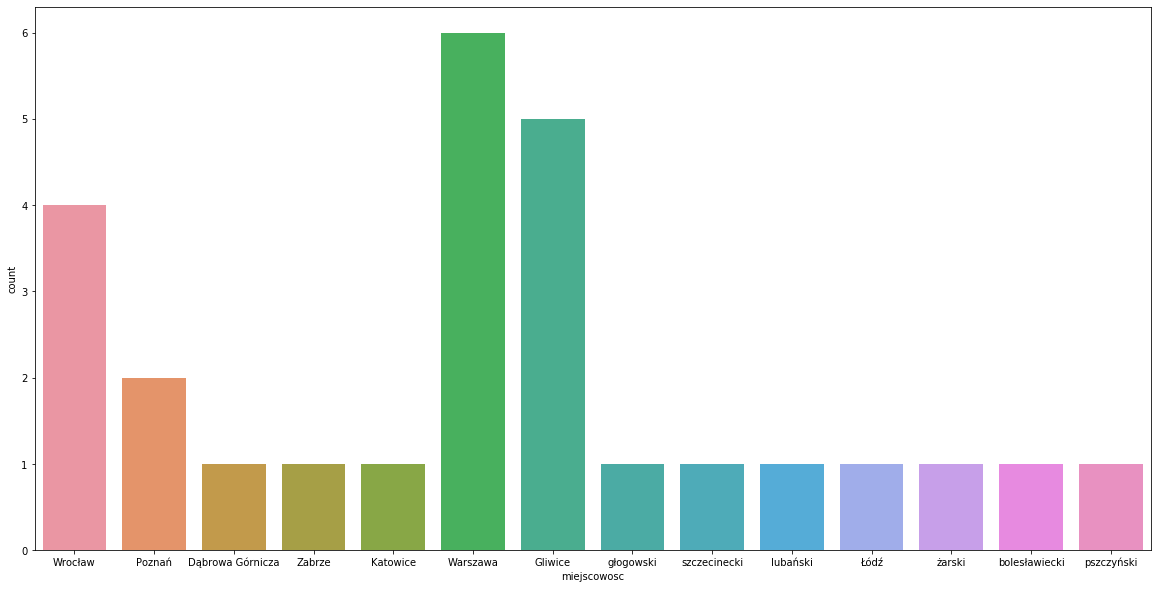

In [63]:
#Liczba najczęsciej występującej miejscowosci w ogłoszneniu
plt.figure(figsize=(20,10))
sns.countplot(df['miejscowosc'])

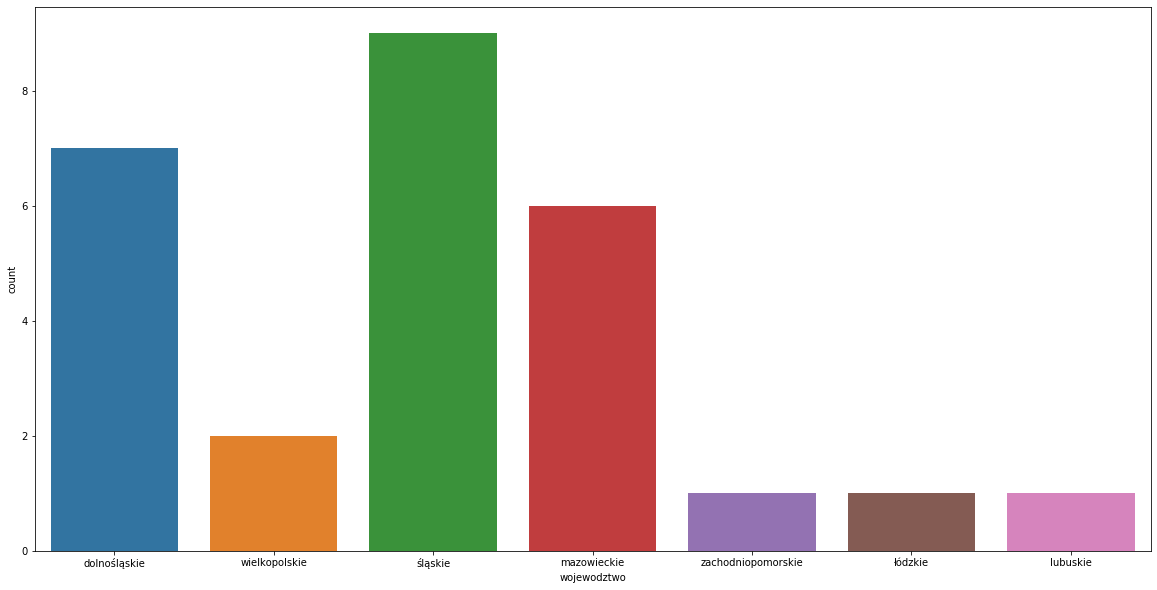

In [71]:
# Wykres przedstawiajacy najczesciej wystepujace wojewodztwo

plt.figure(figsize=(20,10))
sns.countplot(df['wojewodztwo'])

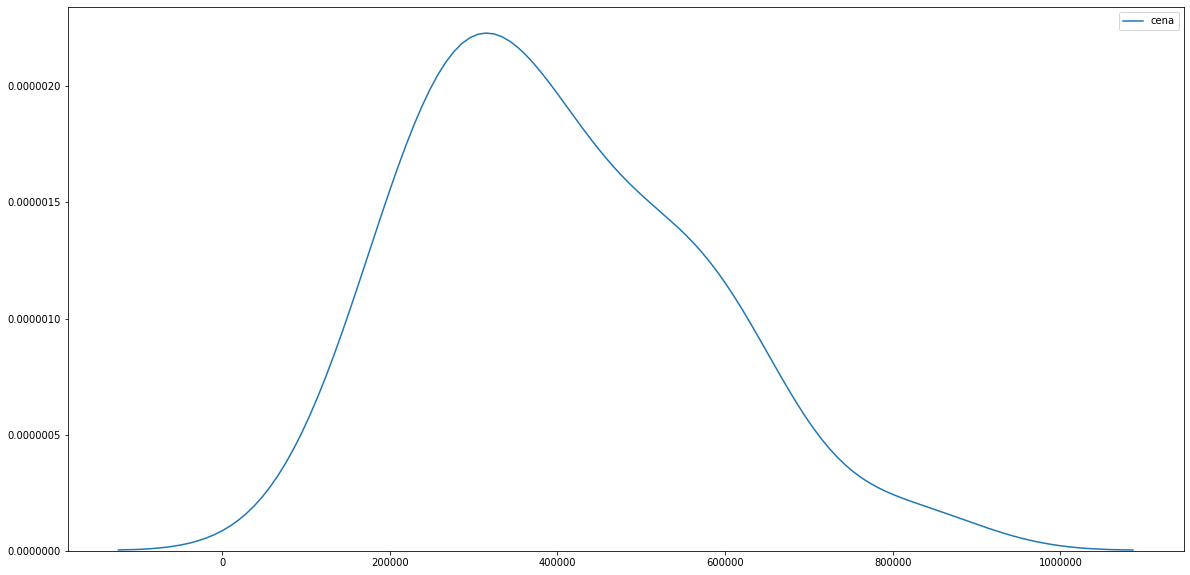

In [72]:
#Wykres przedstawiajcy rozkład cen mieszkań na sprzedaż

plt.figure(figsize=(20,10))

sns.kdeplot(df['cena'])

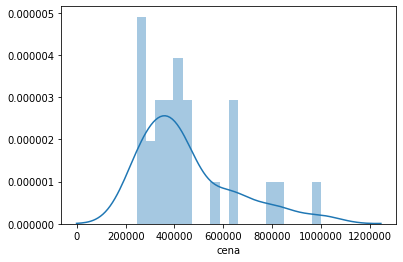

In [44]:
# Wykres displot przedstawiajacy rozkład cen mieszkań na sprzeadż
ax = sns.distplot(df['cena'], bins = 20, kde = True)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


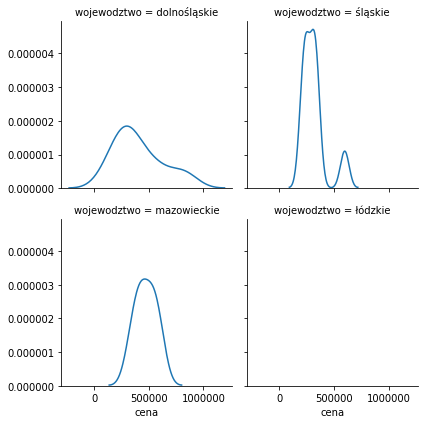

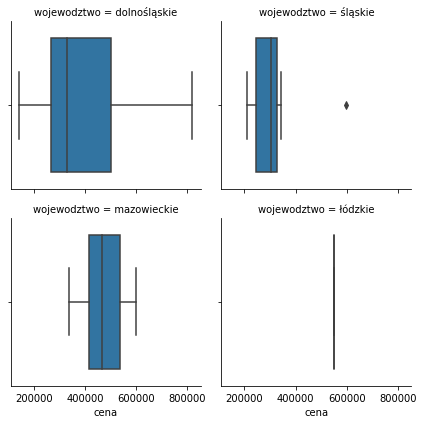

In [90]:
# Rozkłady cen dla kilku wybranych województw

df = df[df["wojewodztwo"].isin(['śląskie','mazowieckie', 'łódzkie', 'dolnośląskie'])]


g = sns.FacetGrid(df, col = "wojewodztwo", col_wrap = 2)
g.map(sns.kdeplot, "cena")

g = sns.FacetGrid(df, col = "wojewodztwo", col_wrap = 2)
g.map(sns.boxplot, "cena")

In [4]:
### OTO DOM ! WYNAJEM !

import requests
from bs4 import BeautifulSoup
import pandas as pd
houselinks=[]
for x in range(1,2):
    r=requests.get(f'https://www.otodom.pl/wynajem/mieszkanie/?page={x}')
    soup=BeautifulSoup(r.content, 'lxml')
    houselist=soup.find_all('div',class_='row section-listing__row')
    for link in soup.find_all("a", {'data-tracking-data':'{"touch_point_button":"title"}'}):
        houselinks.append(link['href'])

# testlink = 'https://www.otodom.pl/pl/oferta/uroczysko-mieszkanie-53-09m2-2-pokoje-z-ogrodem-ID48Nos.html#ab04badaa0'
houselist=[]
for link in houselinks:
    r=requests.get(link)
    soup=BeautifulSoup(r.text, 'lxml')
    body=soup.select('main')[0]

    name=body.find('h1', class_='css-11t1qm5').text.strip()
    cena=body.find('strong',class_='css-1mojccp').text.strip()
    #perMetr=body.find('div',class_='css-4ak5ev').text.strip()
    powierzchnia=body.find_all('div', class_='css-1s5nyln')[2].get_text().strip()
    adres=body.find('a',class_='css-1rg0v62').text.strip()
    wojewodztwo=body.find_all('a',class_='css-1o3vi3l')[1].get_text().strip()
    miejscowosc=body.find_all('a',class_='css-1o3vi3l')[2].get_text().strip()
    SprzedazWynajem=body.find_all('a',class_='css-1o3vi3l')[0].get_text().strip()
    rooms={
        'name':name,
        'cena':cena,
        #'perMetr':perMetr,
        'powierzchnia':powierzchnia,
        'adres':adres,
        'wojewodztwo':wojewodztwo,
        'miejscowosc':miejscowosc,
        'Wynajem':SprzedazWynajem
    }
    houselist.append(rooms)
    #print(rooms['name'],rooms['cena'],rooms['perMetr'],rooms['powierzchnia'],rooms['adres'])


    
    # ogłoszenia mieszkań na wynajem zapisujemy w zmiennej df2, aby nie kolidowac z poprzednimi ogłoszeniami  
df2=pd.DataFrame(houselist)


In [5]:
# usuwamy polskie znaki zł oraz m2 dla kolumny cena oraz powierzchnia

df2.cena=[x.strip('zł') for x in df2.cena]
df2.powierzchnia=[y.strip('m²') for y in df2.powierzchnia]

In [6]:
# usuwamy białe znaki
df2[['cena']] = df2[['cena']].replace(' ', '', regex=True)

In [7]:
# usuwamy z kolumny cena wszystkie wartości nienumeryczne

df2[df2.cena.apply(lambda x: x.isnumeric())]

,name,cena,powierzchnia,adres,wojewodztwo,miejscowosc,Wynajem
0,Do wynajęcia 2-pokojowe mieszkanie w Wieliczce,1650,34,"ul. Władysława Jagiełły, Wieliczka, wielicki, ...",małopolskie,wielicki,Mieszkanie na wynajem
1,Duża Kawalerka - ul. Poleska - Psie Pole - 3po...,1400,45,"Wrocław, Psie Pole, ul. Poleska",dolnośląskie,Wrocław,Mieszkanie na wynajem
2,"Kawalerka na wynajem, Żwirki i Wigury",2000,30,"Warszawa, Ochota, ul. Żwirki i Wigury",mazowieckie,Warszawa,Mieszkanie na wynajem
3,"Mieszkanie 32m2, 2 pokoje z aneksem + ogródek",1600,szeregowiec,"Wrocław, Krzyki, Tarnogaj",dolnośląskie,Wrocław,Mieszkanie na wynajem
4,Stylowe 4 pokoje Dolny Mokotów Śródziemnomorska,4500,Tak,"Warszawa, Mokotów, Stegny, Śródziemnomorska",mazowieckie,Warszawa,Mieszkanie na wynajem
5,Zadbana kawalerka na 1 piętrze#,700,22,"Ostroszowicka, Bielawa, dzierżoniowski, dolnoś...",dolnośląskie,dzierżoniowski,Mieszkanie na wynajem
6,Komfortowa Kawalerka os. Tysiąclecia 4 Wieże,1450,Tak,"Katowice, Osiedle Tysiąclecia, ul. Chorzowska",śląskie,Katowice,Mieszkanie na wynajem
7,Atrakcyjny apartament na 8 piętrze na Przymorzu,2000,2,"Gdańsk, Przymorze, Szczecińska",pomorskie,Gdańsk,Mieszkanie na wynajem
8,"Nowy apartament 38m, balkon, garaż - Green Mok...",1800,38,"Warszawa, Mokotów",mazowieckie,Warszawa,Mieszkanie na wynajem
9,2 pokoje na nowym osiedlu,1810,"38,30","Łódź, Śródmieście",łódzkie,Łódź,Mieszkanie na wynajem


In [30]:
# usuwamy z kolumyn powierzchnia wszystkie wartości nienumeryczne
df2[df2.powierzchnia.apply(lambda x: x.isnumeric())]

,name,cena,powierzchnia,adres,wojewodztwo,miejscowosc,Wynajem
7,Atrakcyjny apartament na 8 piętrze na Przymorzu,2000,2,"Gdańsk, Przymorze, Szczecińska",pomorskie,Gdańsk,Mieszkanie na wynajem
14,Wynajmę mieszkanie 50m 2 pokoje Kino Femina,3000,2,"Warszawa, Wola, ul. Nowolipie",mazowieckie,Warszawa,Mieszkanie na wynajem
25,2-pokojowe mieszkanie na Jeziorańskiego z balk...,2400,5,"Warszawa, Praga-Południe, Gocław, Jana Nowaka-...",mazowieckie,Warszawa,Mieszkanie na wynajem


In [22]:
# rzutujemy kolumnę cena na int
df2["cena"]=df2["cena"].astype(int)

In [23]:
# zapisujemy w zmiennej result2 pogrupowane wartości kolumny miejscowosc względem ceny(int) posumowane
results2=df2.groupby('miejscowosc').sum()
results2

,cena
miejscowosc,
Gdańsk,2000
Gliwice,2900
Katowice,2900
Lublin,2000
Olsztyn,1800
Warszawa,21020
Wrocław,9200
dzierżoniowski,700
pruszkowski,2600


In [11]:
import matplotlib.pyplot as plt

# rozkład przedstawiajacy rozkład wynajmu mieszkania dla danej miejscowości

miasta=df2['miejscowosc'].unique()

plt.bar(miasta,results2['cena'])
plt.xticks(miasta,rotation='vertical',size=8)
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

<Figure size 640x480 with 1 Axes>

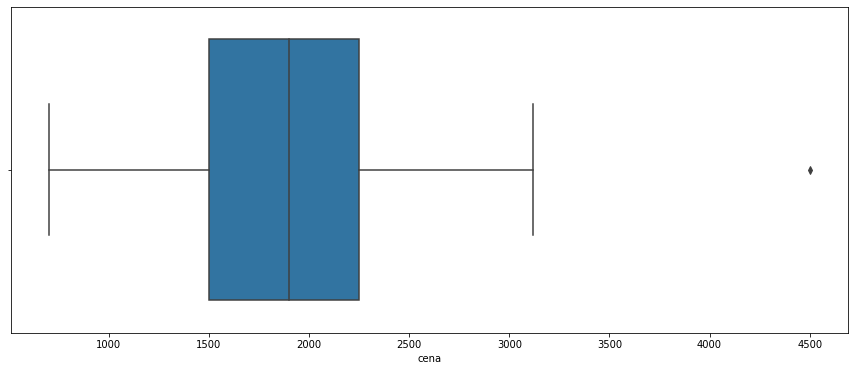

In [12]:
import seaborn as sns

#rozkład przedstawiajacy rozkład cen dla wynajmowanych mieszkań
plt.figure(figsize=(15,6))
sns.boxplot(x=df2['cena'], data=df2)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

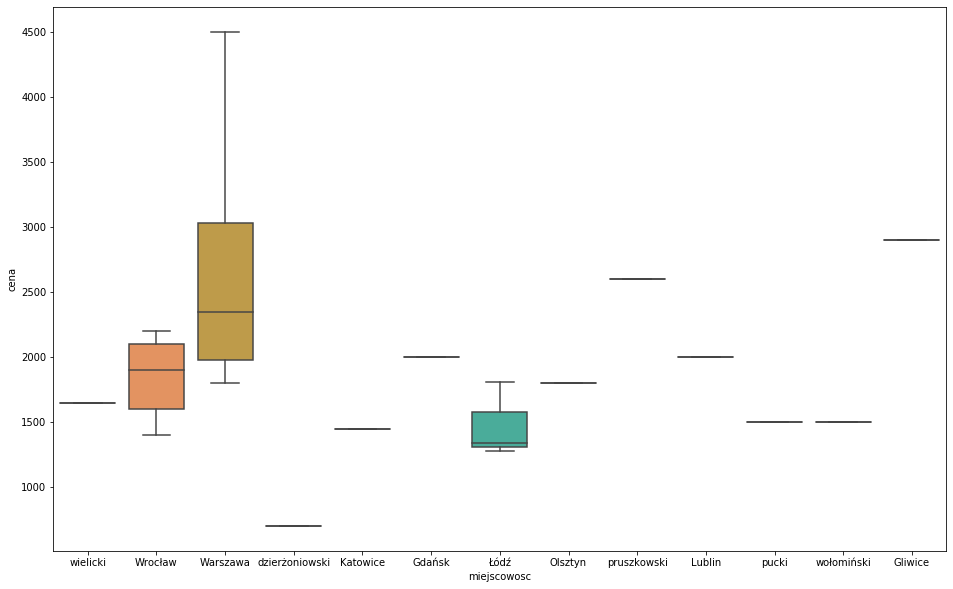

In [13]:
# rozkład przedstawiajacy rozkład miejscowosci względem ceny

plt.figure(figsize=(16,10))
sns.boxplot(x=df2['miejscowosc'], y=df2['cena'], data=df2)
plt.show()

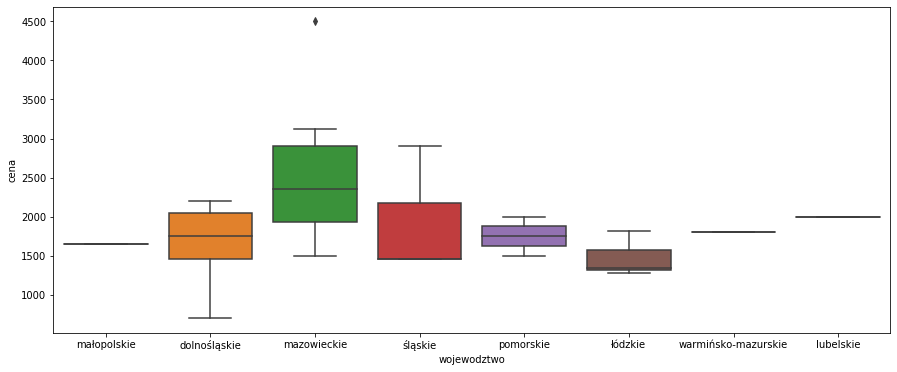

In [14]:
# rozkład przedstawiajacy rozkład wojewodztwa względem ceny

plt.figure(figsize=(15,6))
sns.boxplot(x=df2['wojewodztwo'], y=df2['cena'], data=df2)
plt.show()

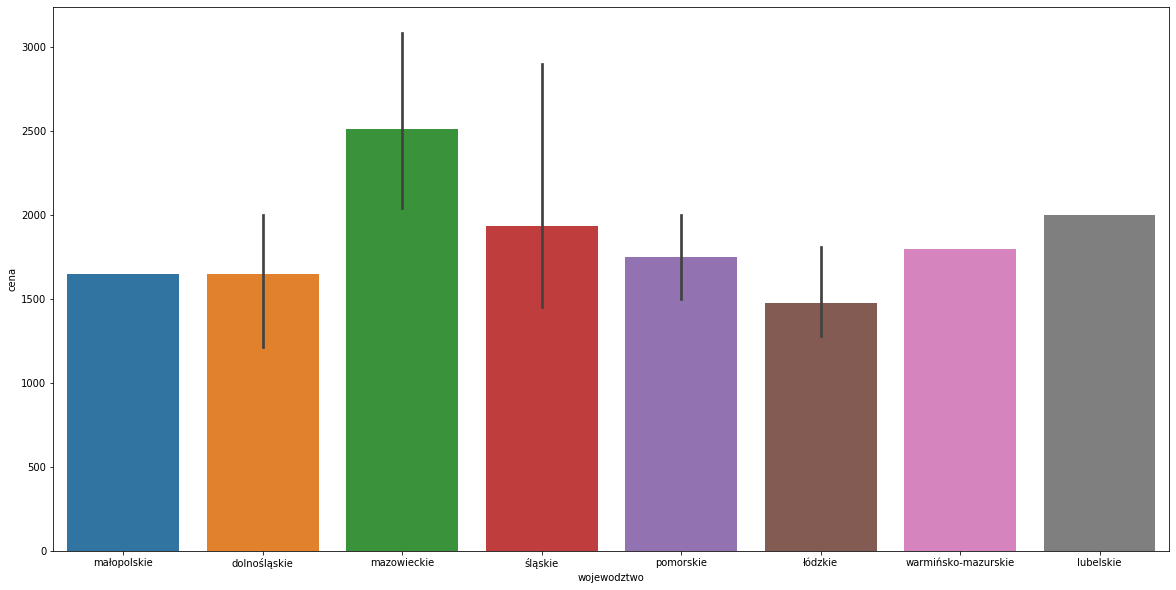

In [15]:
# Wykres przedstawiajacy liczbe z najczesciej wystapujacych wojewodztw względem ceny NAJDROŻSZE MIESZKANIA W WOJ.MAŁOPOLSKIM

plt.figure(figsize=(20,10))
sns.barplot(x=df2['wojewodztwo'], y=df2['cena'], data=df2)

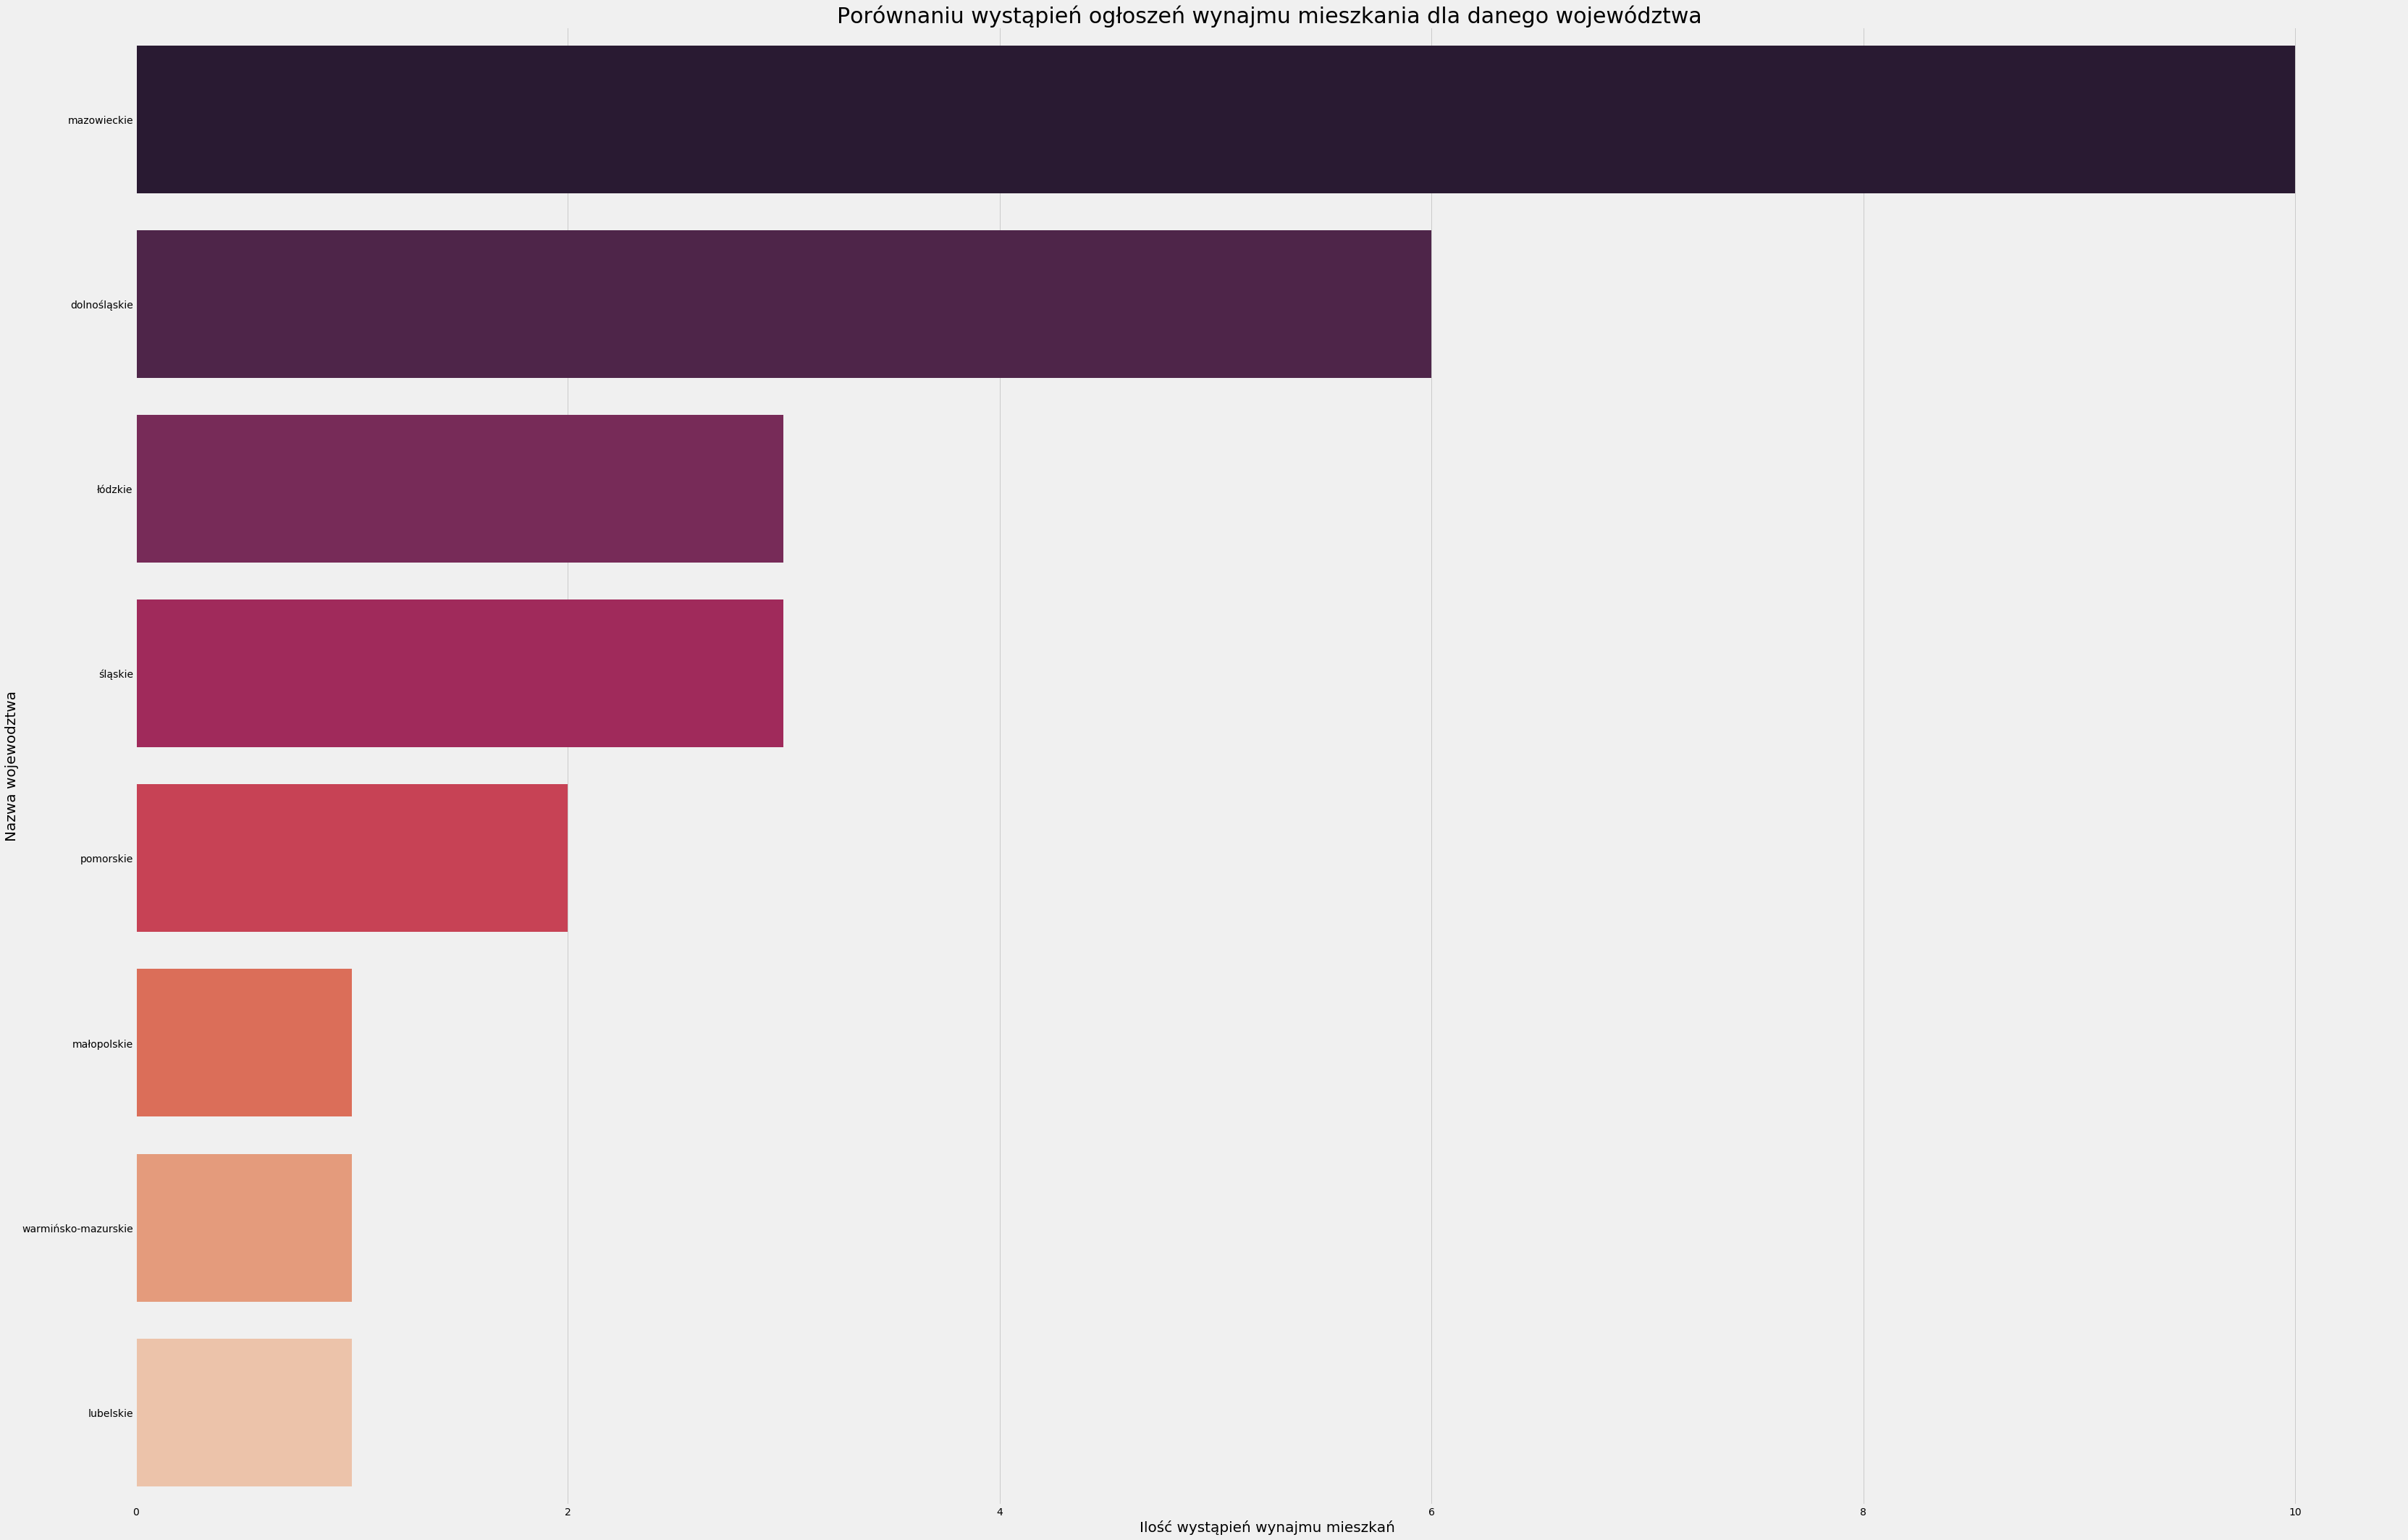

In [17]:

#Rozkład przedstawiajacy rozkład najczęsciej występujacych ogłoszen wynajmu mieszkań z podziałem na wojewodztwa

plt.figure(figsize=(50,35))
plt.style.use('fivethirtyeight')
ax= sns.countplot(y='wojewodztwo', data=df2,order=df2['wojewodztwo'].value_counts(ascending=False).index ,palette='rocket')
ax.set_xlabel(xlabel='Ilość wystąpień wynajmu mieszkań ',fontsize=20)
ax.set_ylabel(ylabel='Nazwa wojewodztwa', fontsize=20)
ax.set_title(label='Porównaniu wystąpień ogłoszeń wynajmu mieszkania dla danego województwa',fontsize=30)

plt.show()

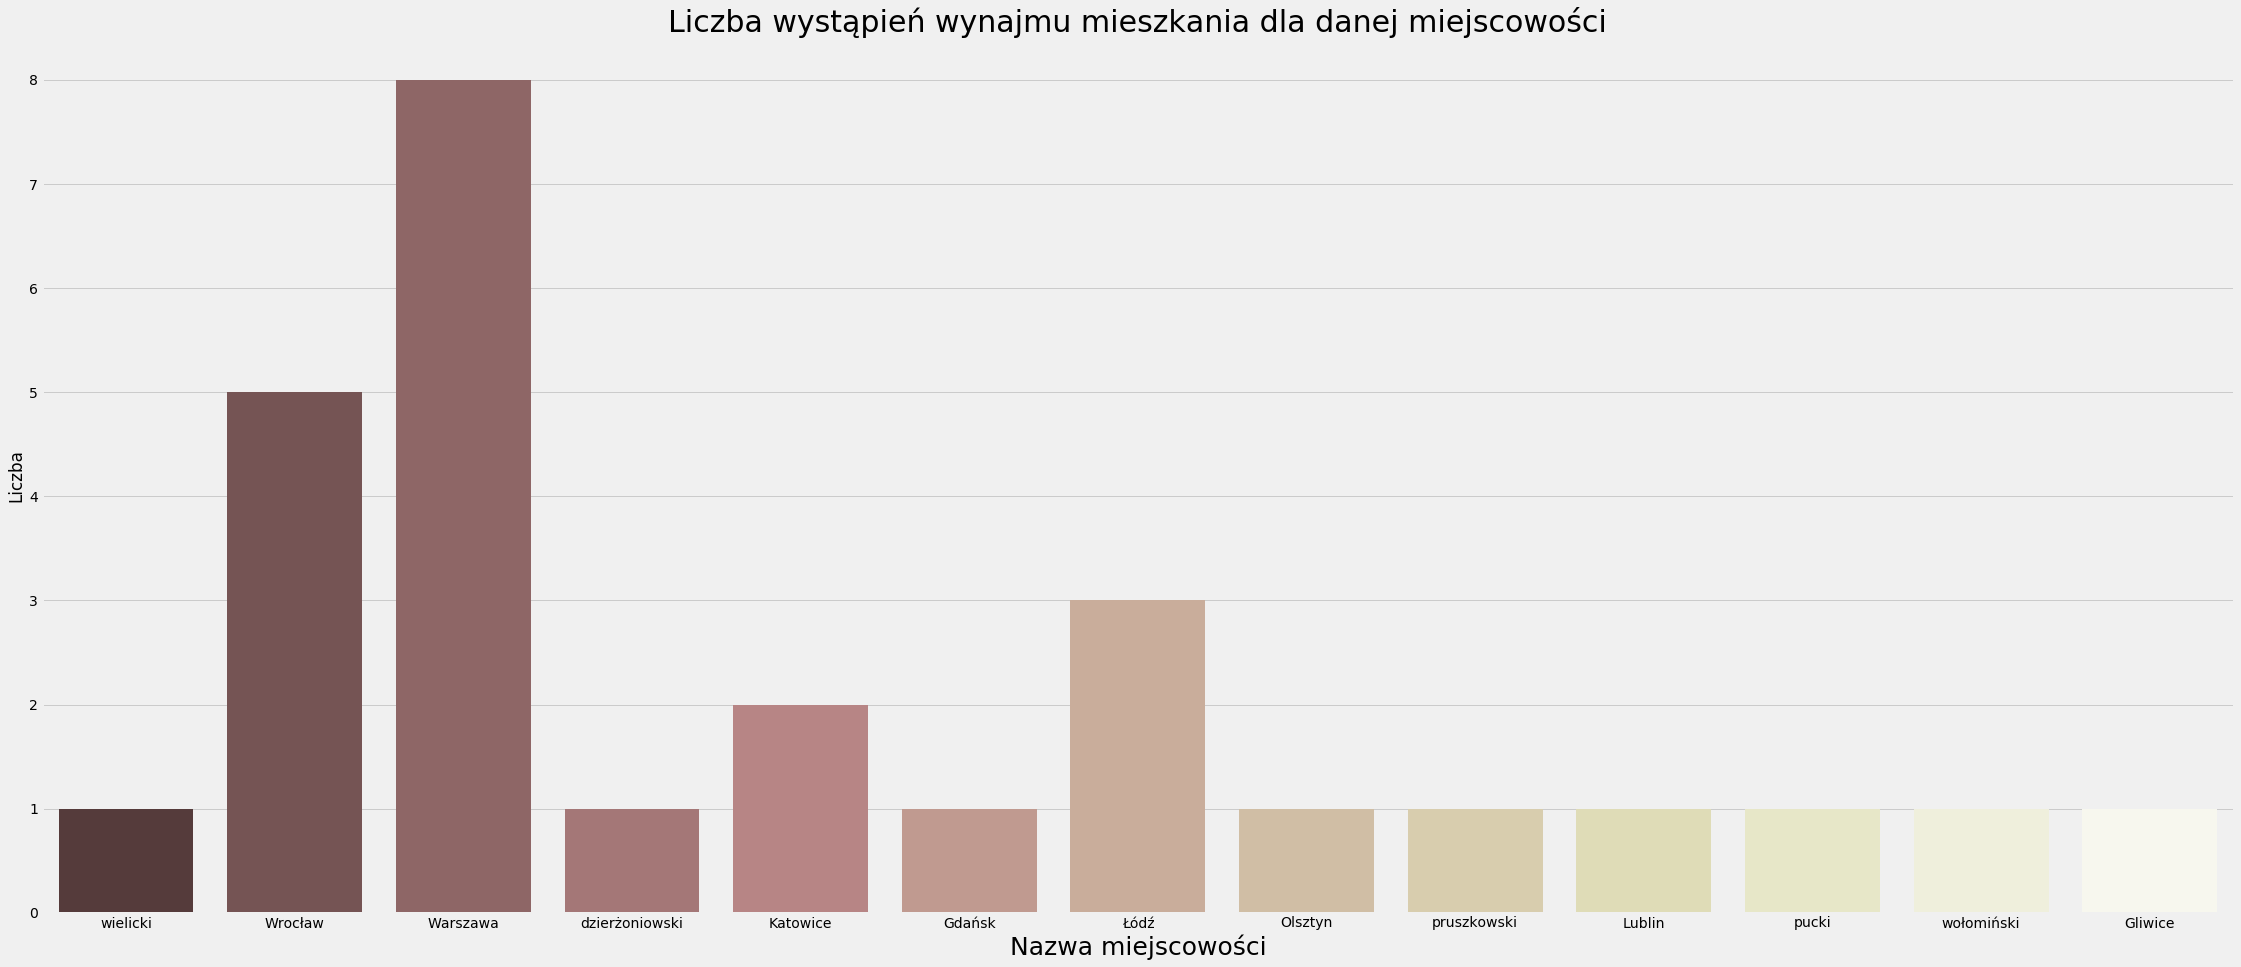

In [18]:
#Rozkład przedstawiajacy rozkład najczęsciej występujacych ogłoszen wynajmu mieszkań z podziałem na miejscowości

plt.rcParams['figure.figsize']=(35,15)
sns.countplot(df2['miejscowosc'],palette='pink')
plt.title('Liczba wystąpień wynajmu mieszkania dla danej miejscowości',fontsize=30)
plt.ylabel('Liczba')
plt.xlabel('Nazwa miejscowości',fontsize=25)

plt.show()

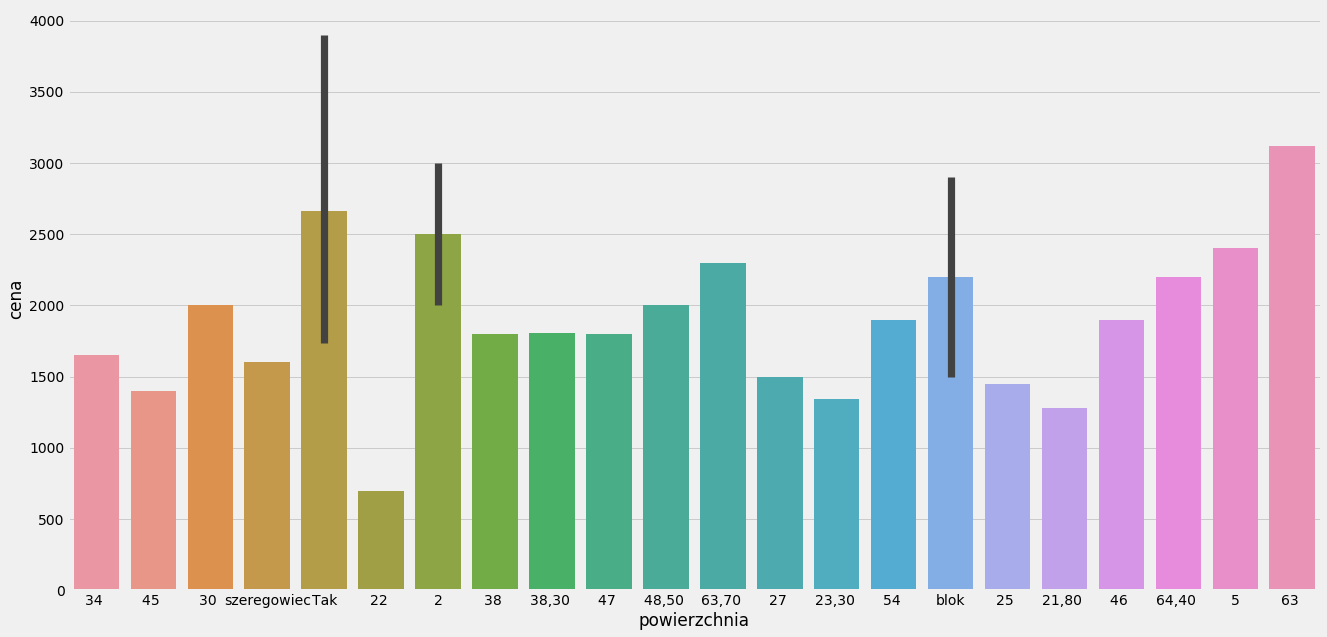

In [31]:
#Rozklad przedtawiajacy wykres slupkowy przedstawiajac cenę powierzni mieszkania na sprzedaż względem ceny

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.barplot(x=df2['powierzchnia'], y=df2['cena'], data=df2)